In [16]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [17]:
faces_all = fetch_olivetti_faces()

In [18]:
X = faces_all.data
y = faces_all.target

In [ ]:
print(X.shape)
#print(y)

In [ ]:
print(X[0])

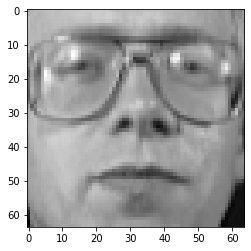

In [215]:
plt.imshow(X[11].reshape(64,64), cmap="gray")

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(200, 4096)
(200, 4096)
(200,)
(200,)


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train) 

In [ ]:
np.mean(log_reg.predict(X_test) == Y_test)

In [21]:
pca = PCA(n_components=50)   # 4096 -> 140
pca.fit(X_train)

print(X_train.shape)

lowX = pca.transform(X_train)
print(lowX.shape)

(200, 4096)
(200, 50)


In [224]:
recon = pca.inverse_transform(lowX)

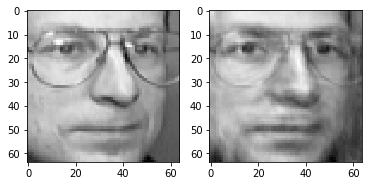

In [227]:
plt.subplot(121)
plt.imshow( X_train[123].reshape(64,64), cmap='gray')
plt.subplot(122)
plt.imshow( recon[123].reshape(64,64), cmap='gray')

In [ ]:
log_reg.fit(lowX, Y_train)

In [ ]:
#pca = PCA(n_components=50)   # 4096 ->  50
#pca.fit(X_test)
lowX_test = pca.transform(X_test)
np.mean(log_reg.predict(lowX_test) == Y_test)

In [60]:
print(pca.singular_values_)

[62.81774  45.419098]


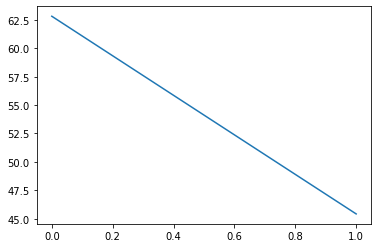

In [61]:
plt.plot(pca.singular_values_)

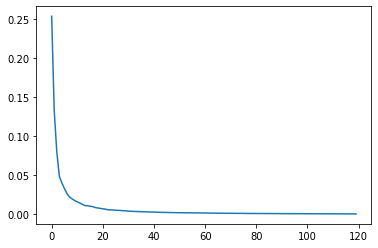

In [65]:
plt.plot(pca.explained_variance_ratio_)

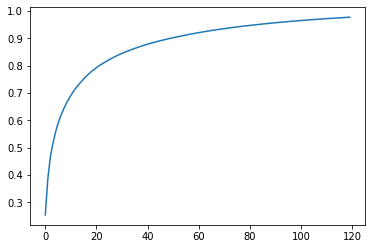

In [66]:
cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs)

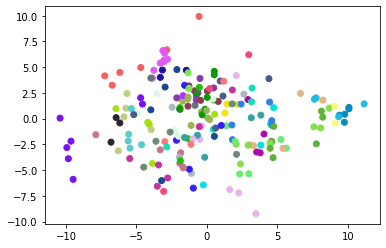

In [71]:
col =  np.random.rand(40,3)
colors = [col[i]  for i in Y_train ]
plt.scatter(lowX[:,0], lowX[:,1], c=colors)

(200, 2)
(200, 1)


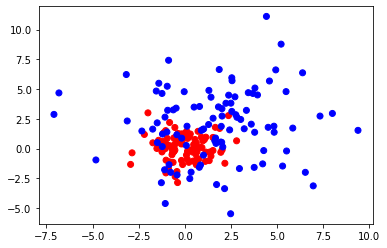

In [118]:
samples = 100

x_data0 = np.random.normal(0, 1, size=[samples,2])  # r == 0 
x_data1 = np.random.normal(2, 3, size=[samples,2])  # b == 1
x_data = np.vstack([x_data0, x_data1])
print(x_data.shape)

y_data = np.vstack([np.zeros(samples).reshape(samples,1) , np.ones(samples).reshape(samples,1) ]) 
print(y_data.shape)

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]

plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [121]:
model = KMeans(n_clusters=2, init="random", max_iter=6).fit(x_data)
print(model.cluster_centers_)

[[ 0.08405416 -0.01854386]
 [ 2.80286802  3.92981491]]


[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0]


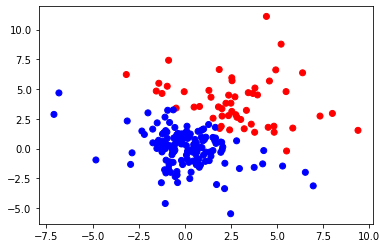

In [122]:
d = ['blue', 'red']
print(model.labels_)
colors = [  d[i] for i in model.labels_]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [125]:
model = KMeans(n_clusters=40, init="random", max_iter=6).fit(X)

print(model.labels_)
print(y)

[28 18 28 17 18 17 28 22 28  4 34  2  2  2  2  2 34 34  2 34 21 21 11  3
  3  0  9  9 35  1 35 33 35 28 33  9 35 35 33 33 31 24 24 31 32 32 31 32
 32 20 27 27 27 27 23 27 23 27 23 23 36 15 36 36 36 36 36 36 36 38 28 18
 28 18 28 28 18 28 17 18  1  1  1 31 31 31 31 31 31  1 12 12 11 11 12 12
 12 12 17 28  8  8  8  8  8  8  8  8  8  8 22 16 16 16 16 22 16  4  4  4
 35 35 35 35 35 33  9  9  1 35 26 10 10 26 26 10 26 26 10 10 33 35 33 33
 35 33 35 33 35 35 34 20 20 36 36 34  2 25 34 20 32 32 11 11 32  6  6 32
  6  6 28 28 28  1 28 28 28 28 28 28 14 14 14 15 15 14 15 15 15 14  5  5
  5  1 20  1 20 20 20  5  5  3  3  3  1  1  3  3  1  3 13 13 13 13 13 29
 13 13 13 13 28  1  1 31  1 31  1  1 22 22 39 39  3  3 11 39 39 39  3  3
  1 11  1 33 31 11  1 31 11 11  0  0 21 21 21  0 36 21  0 11 26 26 26 26
 26 26 26 26 26 26  7  7  7  7  7  7  7  7  7  7 29 29 29  3  3  3  3  3
 29 29  5  5 11  5  5  5  5  5 31  5 31  5  5  5  5  5  5 31  5  5 33 14
 14 36 33 33 33 36 36 36 19 19 19 19 19 19 19 19 19

In [185]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [211]:
pca = PCA(n_components=1)  
pca.fit(X)
pca.explained_variance_ratio_

array([0.92461872])

In [212]:
low = pca.transform(X)

In [201]:
model = KMeans(n_clusters=6, init="random", max_iter=6).fit(low)

In [202]:
model.labels_

array([2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 5, 5, 5, 0, 5, 0,
       0, 5, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 5, 0, 0, 0,
       5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 3, 0, 3, 3, 3, 1, 5, 1, 3, 1,
       3, 3, 3, 0, 0, 3, 3, 1, 1, 0, 3, 0, 1, 0, 3, 1, 0, 0, 3, 3, 1, 1,
       3, 0, 3, 1, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0])

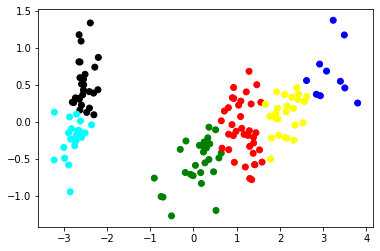

In [203]:
col =  ['red', 'blue', 'black', 'yellow', 'cyan', 'green']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors)

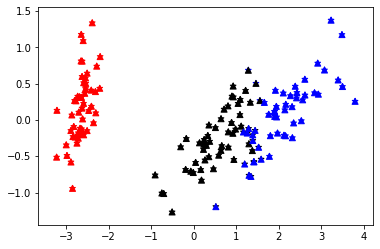

In [178]:
col =  ['red', 'blue', 'black']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='*')

col =  ['red', 'black', 'blue']
colors = [col[i]  for i in y ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='^')


In [213]:
print(low.shape)
reconX = pca.inverse_transform(low)
print(reconX.shape)

print(X[0:10])
print(reconX[0:10])

(150, 1)
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[4.87332632 3.28420238 1.45858847 0.23764012]
 [4.86247892 3.28673941 1.4328746  0.22688569]
 [4.79929088 3.30151808 1.2830867  0.16423922]
 [4.85120324 3.28937661 1.40614547 0.21570665]
 [4.85721176 3.28797132 1.42038875 0.22166368]
 [5.01906124 3.25011732 1.8040546  0.38212597]
 [4.82402881 3.29573228 1.34172822 0.18876513]
 [4.89427975 3.27930171 1.50825879 0.25841396]
 [4.80023332 3.30129766 1.28532076 0.16517358]
 [4.87743522 3.28324137 1.46832867 0.2417138 ]]


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

tree = DecisionTreeClassifier(max_depth=7)

iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
tree.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names,  class_names=iris.target_names, rounded=True, filled=True, impurity=True)


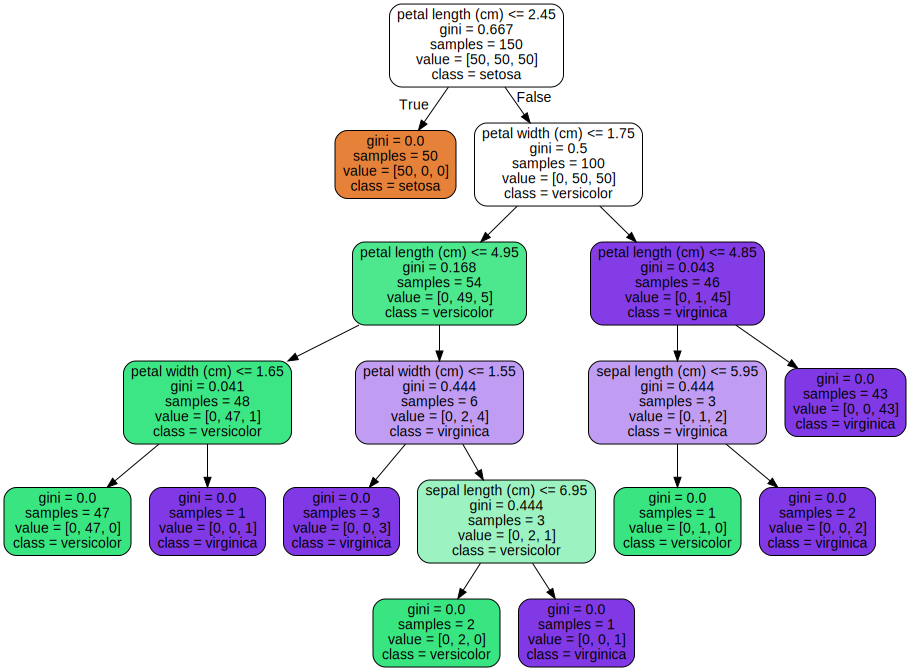

In [14]:
import pydot
graph = pydot.graph_from_dot_file("iris.dot")[0]
import graphviz
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))



In [27]:
# lowX
X = faces_all.data
y = faces_all.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)

In [36]:
pca = PCA(n_components=100)   
pca.fit(X_train)

lowX = pca.transform(X_train)
lowX_test = pca.transform(X_test)

tree = DecisionTreeClassifier(max_depth=20)
tree.fit(lowX, Y_train)
print(np.mean(tree.predict(lowX) == Y_train))
print(np.mean(tree.predict(lowX_test) == Y_test))

1.0
0.46


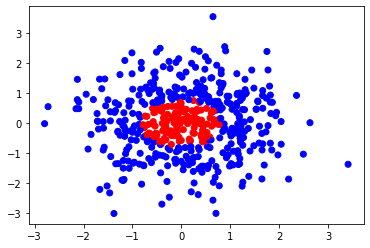

In [40]:
samples = 500
x_data = np.random.normal(0, 1, size=[samples,2])
d = np.sqrt([x[0]**2+x[1]**2  for x in x_data ])
y_data = np.array([0  if   i < 0.8   else   1 for i  in d   ]).reshape(samples, 1)
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [41]:
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
log_reg.score(x_data, y_data)  #  np.mean(log_reg.predict(x_data) == y_data)


0.726

In [43]:
log_reg.predict(x_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

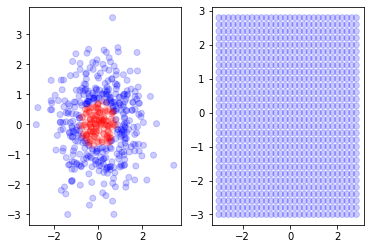

In [45]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)


xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = log_reg.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

In [57]:
from sklearn.svm import SVC     
model = SVC(kernel='poly', degree=2).fit(x_data, y_data) 

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


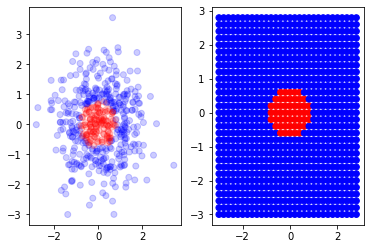

In [58]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=1)

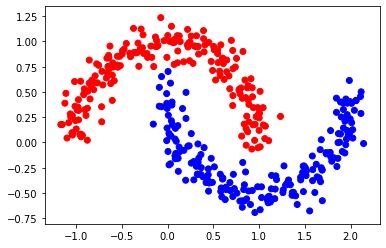

In [60]:
from sklearn.datasets import make_moons
x_data, y_data= make_moons(n_samples=400, noise=0.1, random_state=0)

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)


In [71]:
model = SVC(kernel='rbf').fit(x_data, y_data) 

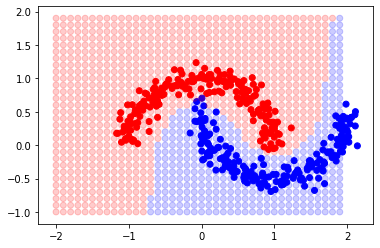

In [73]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

In [86]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

poly.fit([[1,2]])
print(poly.transform([[1,2]]))

[[1. 1. 2. 1. 2. 4.]]


In [81]:
poly.fit(x_data)
X2 = poly.transform(x_data)
log_reg = LogisticRegression()
log_reg.fit(X2, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

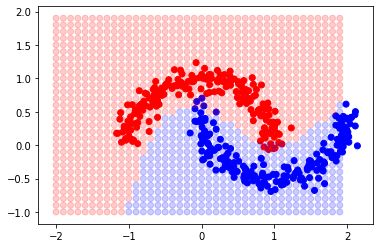

In [80]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
grid = poly.transform(grid)
p = log_reg.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

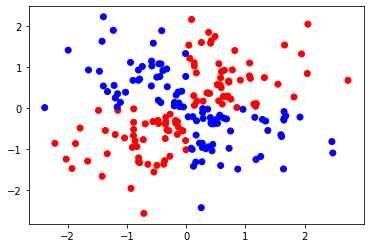

In [88]:
x_data = np.random.randn(200, 2)
y_data  = np.logical_xor(x_data[:, 0] > 0, x_data[:, 1] > 0)*2-1


colors = ["red"  if   i  == -1  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)